## 空间维度

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

coor = pd.read_csv("./datasets/probe/probe0.1.csv")
coor = coor.values[:, 5:7]
loss_log = np.load("./checkpoint/Log_18p_pre_2k.npy", allow_pickle=True)
eq_loss = [i["eq"] for i in loss_log]
data_loss = [i["data"] for i in loss_log]
eq_loss = np.array(eq_loss)
data_loss = np.array(data_loss)
print("eq_loss shape:", eq_loss.shape)
print("data_loss shape:", data_loss.shape)
all_loss = np.sqrt(eq_loss**2 + data_loss**2)

eq_loss shape: (2000, 3, 5094)
data_loss shape: (2000, 3, 5094)


In [4]:
np.random.seed(1)
time_tmp = np.linspace(1, 50, 50, endpoint=True).astype(int)
time_array = np.random.choice(time_tmp, 18)
time_array.sort()
print(time_array)

[ 1  2  6  7  8  9 10 12 13 13 16 17 21 26 38 38 44 46]


In [5]:
def plotSpace(loss, title, step=50):
    from scipy.interpolate import griddata
    import matplotlib.animation as animation

    x = coor[:, 0]
    y = coor[:, 1]

    width = max(x) - min(x)
    height = max(y) - min(y)

    grid_x, grid_y = np.mgrid[
        np.min(x) - 0.5 : np.max(x) + 0.5 : width * 50j,
        np.min(y) - 0.5 : np.max(y) + 0.5 : height * 50j,
    ]

    fig, axs = plt.subplots(1, 4, figsize=(25, 3))
    fig.suptitle(title, x=0.44, y=0.98, fontsize=16)
    for i, ax in enumerate(axs):
        # interpolation
        grid_new = griddata(coor, loss[step * i, :], (grid_x, grid_y), method="cubic")
        c = ax.pcolormesh(grid_x, grid_y, grid_new, cmap="RdBu_r")
        ax.set_title("Epoch" + str(step * i))
        ax.scatter(coor[:, 0], coor[:, 1], s=1, c="k")

    plt.colorbar(c, ax=axs)
    plt.show()


epoch timepoint samplepoint :  (2000, 18, 283)


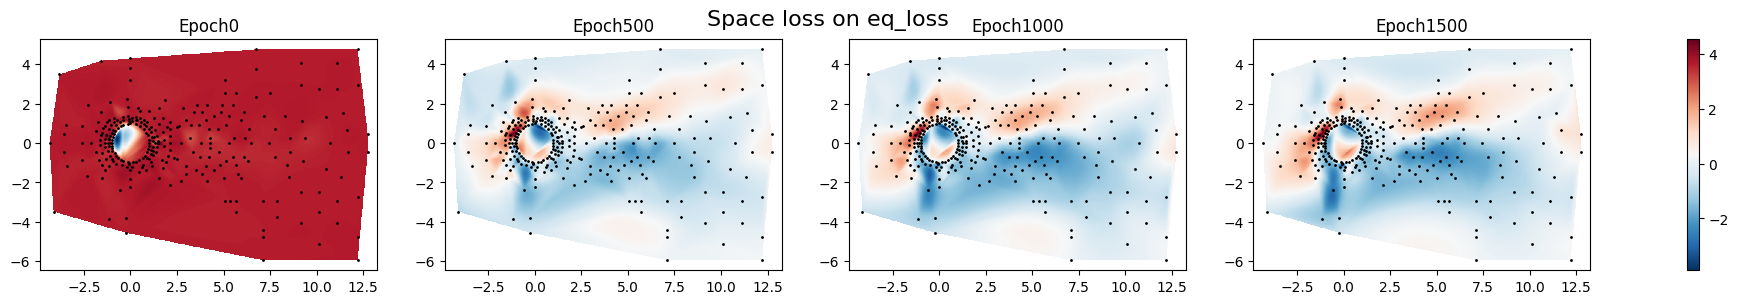

In [6]:
eq_loss_ = np.sum(eq_loss, axis=1).reshape((len(eq_loss), len(time_array), -1))
print("epoch timepoint samplepoint : ", eq_loss_.shape)  # epoch timepoint samplepoint
space_loss = np.sum(eq_loss_, axis=1)
plotSpace(space_loss, "Space loss on eq_loss", step=500)


epoch timepoint samplepoint :  (2000, 18, 283)


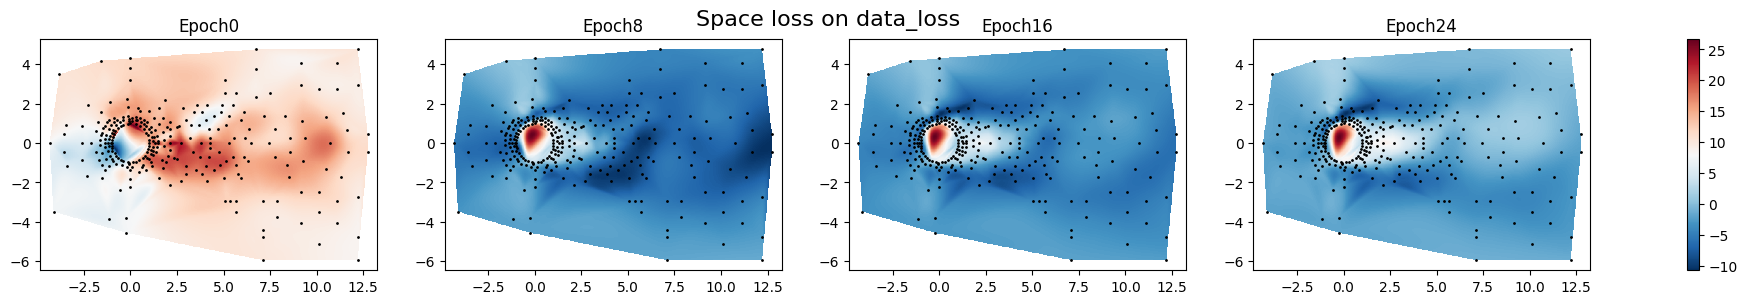

In [12]:
data_loss_ = np.sum(data_loss, axis=1).reshape((len(data_loss), len(time_array), -1))
print("epoch timepoint samplepoint : ", data_loss_.shape)  # epoch timepoint samplepoint
space_loss = np.sum(data_loss_, axis=1)
plotSpace(space_loss, "Space loss on data_loss", step=8)

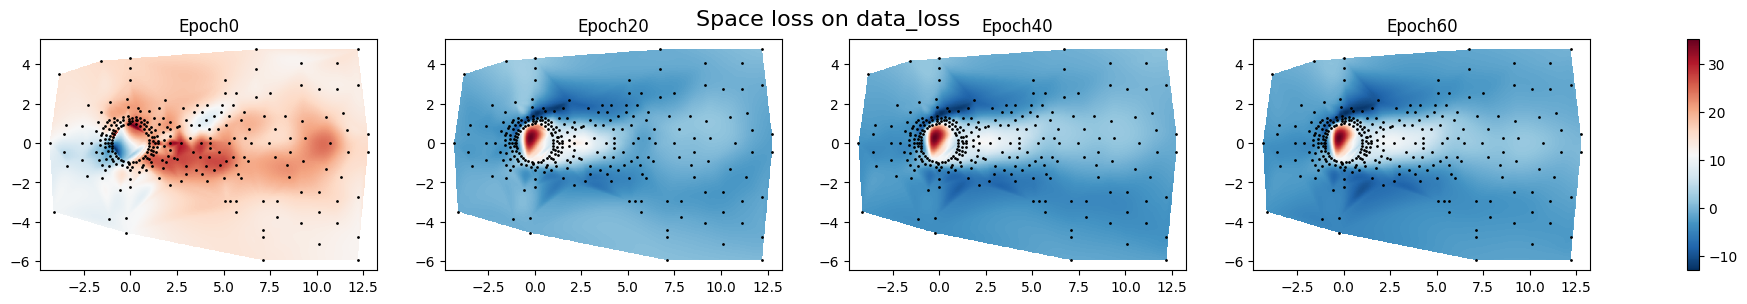

In [14]:
plotSpace(space_loss, "Space loss on data_loss", step=20)

观察到 data_loss 从圆柱下流流场随着迭代次数的增加而减小。模型在学习如何预测圆柱下流流场变换。

但是也注意到圆柱顶点的 loss 一直比较大 。 

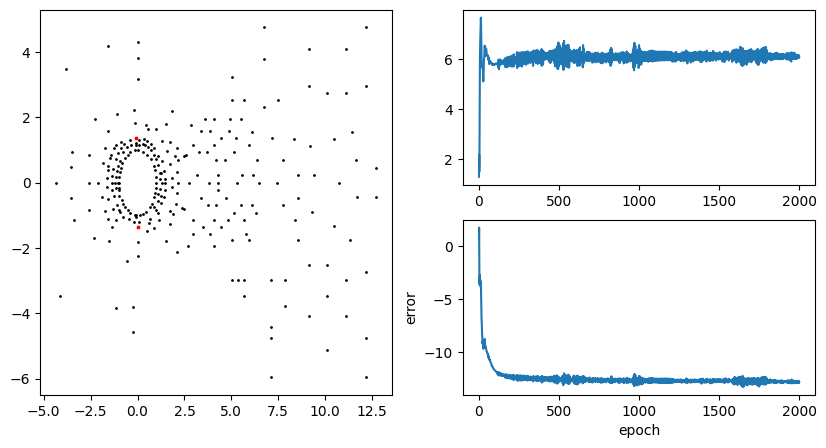

In [109]:
temp = coor[coor[:, 0] > -0.2]
temp = temp[temp[:, 0] < 0]
temp = temp[temp[:, 1] < 1.4]
temp = temp[temp[:, 1] > -1.4]
above , below = np.argmax(temp[:, 1]), np.argmin(temp[:, 1])
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(coor[:, 0], coor[:, 1], s=1, c="k")
plt.scatter(temp[above,0],temp[above,1], s=3, c="r")
plt.scatter(temp[below,0],temp[below,1], s=3, c="r")
plt.subplot(2,2,2)
plt.plot(space_loss[:,above])
plt.subplot(2,2,4)
plt.plot(space_loss[:,below])
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()

epoch timepoint samplepoint :  (2000, 18, 283)


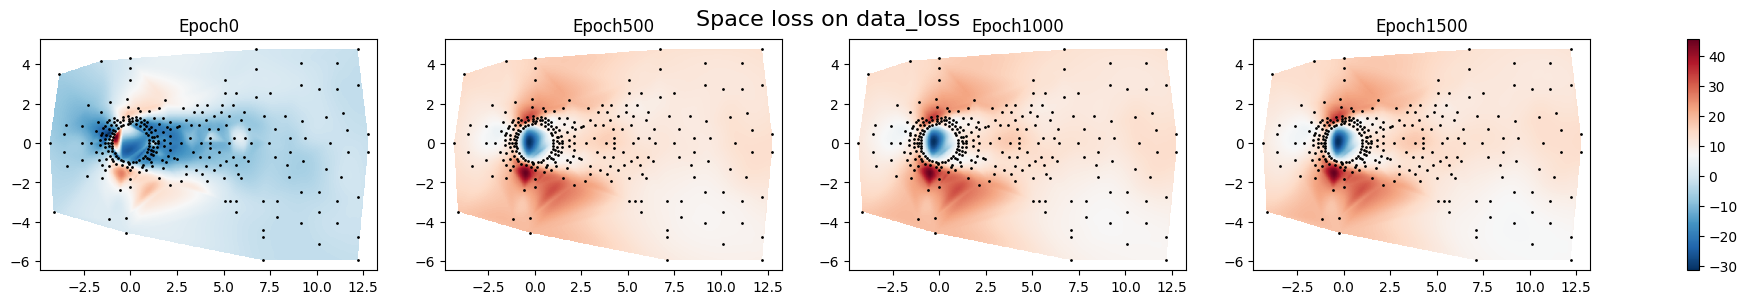

In [8]:
all_loss_ = np.sum(all_loss, axis=1).reshape((len(all_loss), len(time_array), -1))
print("epoch timepoint samplepoint : ", all_loss_.shape)  # epoch timepoint samplepoint
space_loss = np.sum(all_loss_, axis=1)
plotSpace(space_loss, "Space loss on data_loss", 500)
